In [1]:
import numpy as np
import pandas as pd
import os
os.chdir('C:/Users/joyh1/Desktop/GitRepo/data/')

In [73]:
# 데이터 로드
data = pd.read_csv('coursea_data.csv')
data.shape

(891, 7)

## Attribute 설명
- course_title : Contains the course title.
- course_organization : It tells which organization is conducting the courses.
- courseCertificatetype : It has details about what are the different certifications available in courses.
- course_rating : It has the ratings associated with each course.
- course_difficulty : It tells about how difficult or what is the level of the course.
- coursestudentsenrolled : It has the number of students that are enrolled in the course.

In [74]:
# 데이터 결측치 확인
data.isnull().sum()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [75]:
# 필요없는 칼럼 삭제
del data['Unnamed: 0']
data.columns

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_rating', 'course_difficulty', 'course_students_enrolled'],
      dtype='object')

In [76]:
# 데이터 미리보기
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [77]:
# 데이터 칼럼별 타입확인
data.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [78]:
# 해당 코스에 등록한 학생수들 value 숫자로 바꿔주기
# k는 1000을 의미
# m은 백만(1000000)을 의미
data['number_students_enrolled'] = '' 
for i in range(0, len(data.index)):
    if 'k' in data.loc[i, 'course_students_enrolled']:
        data.loc[i, 'number_students_enrolled'] = float(data.loc[i, 'course_students_enrolled'].replace('k',''))*1000
    else:
        data.loc[i, 'number_students_enrolled'] = float(data.loc[i, 'course_students_enrolled'].replace('m',''))*1000000
        
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,number_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,320000


In [80]:
# int형으로 다시 바꾸기
data['number_students_enrolled'] = data['number_students_enrolled'].astype(int)
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,number_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,320000


In [81]:
# 변경전 칼럼 삭제
del data['course_students_enrolled']
data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,number_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Malgun Gothic',
       style='whitegrid',
       rc={'axes.unicode_minus':False})

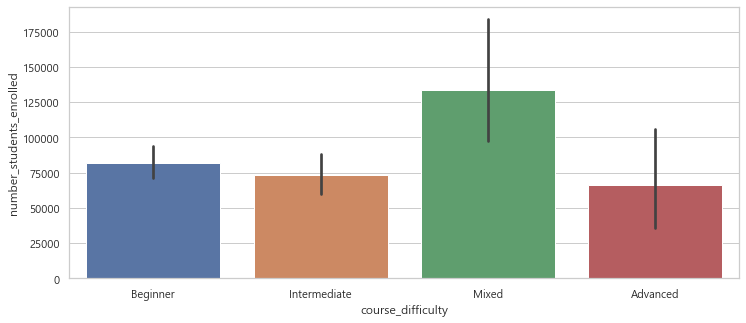

In [93]:
plt.figure(figsize=(12,5))
sns.barplot(data=data, x='course_difficulty', y='number_students_enrolled')